### Name: Samarth Singh
Task 1
Prediction using supervised ML

In [6]:
#reading csv file of students score
import pandas as pd

df = pd.read_csv("studentscores.csv")
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
rows, cols = df.shape
print("Number of Rows       = ", rows)
print("Number of Columns    = ", cols)

Number of Rows       =  25
Number of Columns    =  2


In [8]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<AxesSubplot:xlabel='Scores', ylabel='Count'>

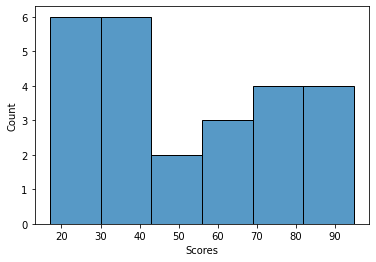

In [11]:
import seaborn as sns
sns.histplot(df['Scores'])

<AxesSubplot:xlabel='Hours', ylabel='Count'>

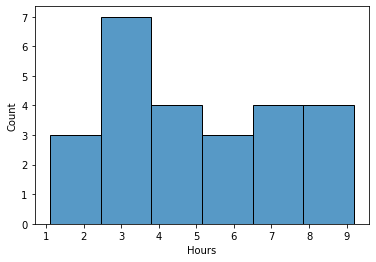

In [12]:
sns.histplot(df['Hours'])

In [13]:
corr = df.corr(method="pearson") # we can use spearman if we want
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


(array([[25.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  5.,  4.,  3.,  1.,  2.,  4.,  2.,  3.]]),
 array([ 1.1 , 10.49, 19.88, 29.27, 38.66, 48.05, 57.44, 66.83, 76.22,
        85.61, 95.  ]),
 <a list of 2 BarContainer objects>)

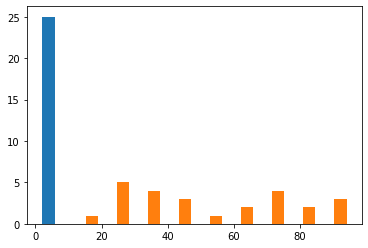

In [14]:
import matplotlib.pyplot as plt

plt.hist(df)

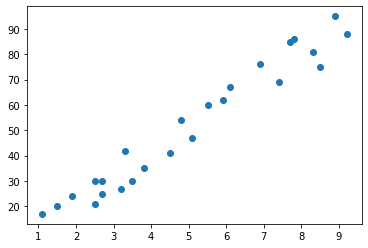

In [15]:
plt.scatter(df['Hours'],df['Scores'])

In [16]:
X = df[['Hours']]  #df.iloc[:, :-1].values  
y = df[['Scores']]  #df.iloc[:, 1].values  
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
dtypes: float64(1)
memory usage: 328.0 bytes


In [17]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

In [18]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

In [19]:
print(X_test) 
y_pred = regressor.predict(X_test) 

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


Text(0.5, 1.0, 'train plot')

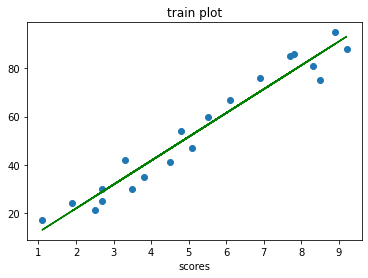

In [20]:
import matplotlib.pyplot as plt
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train) , color = "Green")
plt.xlabel("hours")
plt.xlabel("scores")
plt.title("train plot")

Text(0.5, 1.0, 'Test plot')

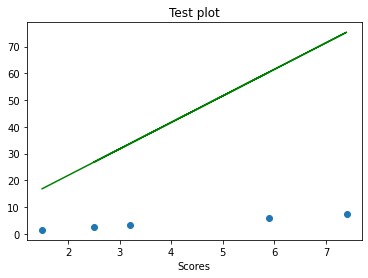

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_test, X_test)
plt.plot(X_test, regressor.predict(X_test) , color = "Green")
plt.xlabel("Hours")
plt.xlabel("Scores")
plt.title("Test plot")

In [22]:
regressor.score(X_test,y_test)

0.9454906892105356

In [23]:
regressor.score(X_train, y_train)

0.9515510725211552

In [24]:
hours = [[9.25]]
own_pred = regressor.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [93.69173249]


In [25]:
import numpy as np 
from sklearn import metrics  
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Error: 21.5987693072174
Root Mean Squared Error: 4.6474476121003665
R-2: 0.9454906892105356
